# 이탈 고객의 여정 탐색

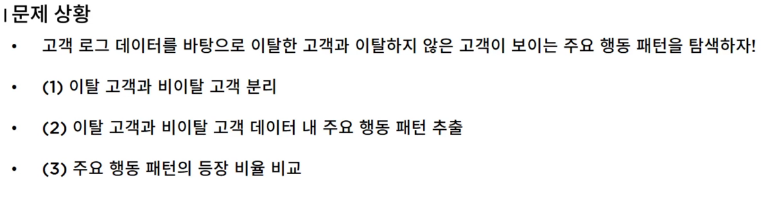

---

### 1. 데이터 읽기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [7]:
os.listdir('data/')

['2018-20_코스피지수.xlsx',
 'AB테스트',
 'E-Commerce_UK.csv',
 'Instacart Market Basket Analysis.csv',
 'Telco_customer_info.csv',
 '고객여정.csv',
 '다이어트약_효과검증.csv',
 '반별_점수_type1.csv',
 '반별_점수_type2.csv',
 '베스트셀러_도서구매기록.txt',
 '성별에따른만족도.csv',
 '성인여성_키_데이터.txt',
 '연관규칙탐사결과.csv',
 '일별_금은달러.xlsx',
 '지점별_일별판매량.csv',
 '페이지내_사용자_이동.csv']

In [9]:
data = pd.read_csv('data/고객여정.csv', encoding='cp949')
data

,고객ID,날짜,행동
0,C_1,2020-01-03,A7
1,C_1,2020-01-08,A6
2,C_1,2020-02-06,A5
3,C_1,2020-02-17,A5
4,C_1,2020-02-18,A7
...,...,...,...
13887,C_1000,2020-05-11,A1
13888,C_1000,2020-05-19,A4
13889,C_1000,2020-05-24,A3
13890,C_1000,2020-06-17,A5


### 2. 데이터 정제

In [10]:
df = data.copy()

In [12]:
df.sort_values(by= ['고객ID', '날짜'], inplace=True)
df

,고객ID,날짜,행동
0,C_1,2020-01-03,A7
1,C_1,2020-01-08,A6
2,C_1,2020-02-06,A5
3,C_1,2020-02-17,A5
4,C_1,2020-02-18,A7
...,...,...,...
13868,C_999,2020-05-24,A1
13869,C_999,2020-05-28,A5
13870,C_999,2020-06-12,A4
13871,C_999,2020-06-25,A5


In [13]:
action_set = df['행동'].unique()
action_set

array(['A7', 'A6', 'A5', 'A1', 'A4', 'A3', 'A2', '이탈'], dtype=object)

In [28]:
df.loc[df['행동']=='이탈']

,고객ID,날짜,행동
13891,C_1000,2020-06-17,이탈
9480,C_701,2020-06-15,이탈
9498,C_702,2020-06-25,이탈
9514,C_703,2020-06-12,이탈
9530,C_704,2020-06-05,이탈
...,...,...,...
13809,C_995,2020-06-19,이탈
13819,C_996,2020-05-24,이탈
13836,C_997,2020-05-21,이탈
13854,C_998,2020-06-14,이탈


In [30]:
out_ID = df.loc[df['행동']=='이탈', '고객ID'].unique()
out_ID

array(['C_1000', 'C_701', 'C_702', 'C_703', 'C_704', 'C_705', 'C_706',
       'C_707', 'C_708', 'C_709', 'C_710', 'C_711', 'C_712', 'C_713',
       'C_714', 'C_715', 'C_716', 'C_717', 'C_718', 'C_719', 'C_720',
       'C_721', 'C_722', 'C_723', 'C_724', 'C_725', 'C_726', 'C_727',
       'C_728', 'C_729', 'C_730', 'C_731', 'C_732', 'C_733', 'C_734',
       'C_735', 'C_736', 'C_737', 'C_738', 'C_739', 'C_740', 'C_741',
       'C_742', 'C_743', 'C_744', 'C_745', 'C_746', 'C_747', 'C_748',
       'C_749', 'C_750', 'C_751', 'C_752', 'C_753', 'C_754', 'C_755',
       'C_756', 'C_757', 'C_758', 'C_759', 'C_760', 'C_761', 'C_762',
       'C_763', 'C_764', 'C_765', 'C_766', 'C_767', 'C_768', 'C_769',
       'C_770', 'C_771', 'C_772', 'C_773', 'C_774', 'C_775', 'C_776',
       'C_777', 'C_778', 'C_779', 'C_780', 'C_781', 'C_782', 'C_783',
       'C_784', 'C_785', 'C_786', 'C_787', 'C_788', 'C_789', 'C_790',
       'C_791', 'C_792', 'C_793', 'C_794', 'C_795', 'C_796', 'C_797',
       'C_798', 'C_

In [31]:
stay_ID = df.loc[~df['고객ID'].isin(out_ID), '고객ID'].unique()
stay_ID

array(['C_1', 'C_10', 'C_100', 'C_101', 'C_102', 'C_103', 'C_104',
       'C_105', 'C_106', 'C_107', 'C_108', 'C_109', 'C_11', 'C_110',
       'C_111', 'C_112', 'C_113', 'C_114', 'C_115', 'C_116', 'C_117',
       'C_118', 'C_119', 'C_12', 'C_120', 'C_121', 'C_122', 'C_123',
       'C_124', 'C_125', 'C_126', 'C_127', 'C_128', 'C_129', 'C_13',
       'C_130', 'C_131', 'C_132', 'C_133', 'C_134', 'C_135', 'C_136',
       'C_137', 'C_138', 'C_139', 'C_14', 'C_140', 'C_141', 'C_142',
       'C_143', 'C_144', 'C_145', 'C_146', 'C_147', 'C_148', 'C_149',
       'C_15', 'C_150', 'C_151', 'C_152', 'C_153', 'C_154', 'C_155',
       'C_156', 'C_157', 'C_158', 'C_159', 'C_16', 'C_160', 'C_161',
       'C_162', 'C_163', 'C_164', 'C_165', 'C_166', 'C_167', 'C_168',
       'C_169', 'C_17', 'C_170', 'C_171', 'C_172', 'C_173', 'C_174',
       'C_175', 'C_176', 'C_177', 'C_178', 'C_179', 'C_18', 'C_180',
       'C_181', 'C_182', 'C_183', 'C_184', 'C_185', 'C_186', 'C_187',
       'C_188', 'C_189', 'C_19'

In [32]:
out_ID_df = df.loc[df['고객ID'].isin(out_ID)]
out_ID_df

,고객ID,날짜,행동
13873,C_1000,2020-01-20,A6
13874,C_1000,2020-02-16,A2
13875,C_1000,2020-02-20,A5
13876,C_1000,2020-02-23,A5
13877,C_1000,2020-03-02,A7
...,...,...,...
13868,C_999,2020-05-24,A1
13869,C_999,2020-05-28,A5
13870,C_999,2020-06-12,A4
13871,C_999,2020-06-25,A5


In [33]:
stay_ID_df = df.loc[df['고객ID'].isin(stay_ID)]
stay_ID_df

,고객ID,날짜,행동
0,C_1,2020-01-03,A7
1,C_1,2020-01-08,A6
2,C_1,2020-02-06,A5
3,C_1,2020-02-17,A5
4,C_1,2020-02-18,A7
...,...,...,...
1337,C_99,2020-04-16,A7
1338,C_99,2020-04-28,A4
1339,C_99,2020-05-03,A1
1340,C_99,2020-05-04,A6


In [35]:
out_ID_sequence = out_ID_df.groupby('고객ID')['행동'].apply(np.array)
out_ID_sequence

고객ID
C_1000    [A6, A2, A5, A5, A7, A6, A7, A4, A1, A7, A5, A...
C_701     [A4, A6, A7, A2, A2, A5, A6, A7, A3, A6, A4, A...
C_702     [A6, A4, A6, A4, A3, A7, A4, A6, A6, A7, A2, A...
C_703     [A4, A6, A7, A6, A4, A6, A4, A6, A7, A4, A2, A...
C_704     [A5, A6, A4, A4, A3, A2, A7, A7, A7, A7, A7, A...
                                ...                        
C_995     [A2, A7, A7, A2, A5, A2, A6, A4, A6, A4, A4, A...
C_996              [A2, A2, A4, A1, A5, A7, A7, A3, A5, 이탈]
C_997     [A3, A6, A5, A6, A4, A5, A3, A2, A7, A7, A4, A...
C_998     [A5, A5, A1, A4, A5, A6, A7, A4, A1, A2, A2, A...
C_999     [A7, A6, A2, A4, A1, A4, A6, A4, A5, A2, A4, A...
Name: 행동, Length: 300, dtype: object

In [36]:
stay_ID_sequence = stay_ID_df.groupby('고객ID')['행동'].apply(np.array)
stay_ID_sequence

고객ID
C_1      [A7, A6, A5, A5, A7, A1, A1, A4, A7, A5, A5, A...
C_10     [A2, A6, A6, A4, A5, A6, A2, A3, A7, A6, A4, A...
C_100    [A5, A2, A5, A2, A3, A3, A7, A1, A1, A5, A6, A...
C_101    [A2, A7, A6, A2, A5, A1, A2, A5, A7, A3, A7, A...
C_102             [A4, A3, A4, A1, A1, A1, A6, A1, A6, A7]
                               ...                        
C_95              [A1, A2, A6, A2, A6, A1, A5, A5, A5, A5]
C_96          [A4, A3, A1, A2, A1, A1, A2, A3, A5, A4, A4]
C_97     [A4, A3, A7, A1, A4, A4, A4, A3, A1, A1, A7, A...
C_98      [A7, A1, A7, A1, A4, A3, A3, A4, A1, A4, A1, A3]
C_99          [A7, A2, A3, A6, A4, A3, A7, A4, A1, A6, A3]
Name: 행동, Length: 700, dtype: object

In [45]:
from itertools import product

def contain_pattern(record, pattern, L):
    output = False    
    if set(record) & set(pattern) != set(pattern): # pattern에 포함된 모든 아이템 집합이 record에 포함된 아이템 집합에 속하지 않으면
        return False    
    else:
        # 패턴에 속한 개별 아이템에 대한 위치를 미리 구하기
        pattern_index_list = [np.where(record == item)[0] for item in pattern]
        
        ## 가능한 모든 조합에서 위치 간 거리가 L이하면 True를 반환
        # record = [A, B, C, A, C, C], pattern = [A, B], L = 1
        # A의 위치: [0, 3], B의 위치: [1]
        # 가능한 모든 조합: [0, 1], [3, 1]
        # 가능한 모든 조합의 거리 차이: [1 - 0, 1 - 3] 중에 0번째 요소는 만족하므로 True
        
        for pattern_index in product(*pattern_index_list):
            distance = np.array(pattern_index)[1:] - np.array(pattern_index)[:-1]
            if sum((distance <= L) & (distance > 0)) == (len(pattern_index) - 1):
                output = True
                break
        
        return output

In [46]:
def find_maximum_frequent_sequence_item(item_set, sequence_data, min_support = 0.001, L = 1):
    queue = []
    maximum_frequent_sequence_item = []
    
    # 유니크한 아이템 집합에 대해, min_support가 넘는 아이템들만 queue에 추가시킴
    for item in item_set:
        occurence = sequence_data.apply(contain_pattern, pattern = [item], L = L).sum()
        if occurence / len(sequence_data) >= min_support:
            queue.append([item])

    while queue:
        current_pattern = queue.pop() # 맨 마지막 값 빼기
        check_maximum_frequent = True # 모든 자식 집합이 min_support를 넘기지 않으면 True를 유지
        for item in item_set:
            occurence = sequence_data.apply(contain_pattern, pattern = current_pattern + [item], L = L).sum()
            if occurence / len(sequence_data) >= min_support: # min_support를 넘는 패턴을 queue에 추가
                check_maximum_frequent = False 
                queue.append(current_pattern + [item])
        
        if check_maximum_frequent and len(current_pattern) > 1:
            maximum_frequent_sequence_item.append(current_pattern)        
    
    return maximum_frequent_sequence_item

In [47]:
def generate_association_rules(maximum_frequent_sequence_item, sequence_data, min_support = 0.01, min_confidence = 0.5, L = 1):
    # 결과 초기화
    result = []
        
    for sequence_item in maximum_frequent_sequence_item:
        # A -> B에서 A, B를 모두 포함하는 가짓 수 co_occurence 계산
        co_occurence = sequence_data.apply(contain_pattern, pattern = sequence_item, L = L).sum()
        support = co_occurence / len(sequence_data)
        if co_occurence > min_support:
            for i in range(len(sequence_item)-1, 0, -1): # 한 아이템 집합에 대해, 부모의 크기를 1씩 줄여나가는 방식으로 부모와 자식 설정
                antecedent = sequence_item[:i]
                consequent = sequence_item[i:]
                antecedent_occurence = sequence_data.apply(contain_pattern, pattern = antecedent, L = L).sum()
               
                confidence = co_occurence / antecedent_occurence
                if confidence > min_confidence:
                    result.append(sequence_item)            
    
    return result

In [57]:
maximum_frequent_sequence_item = find_maximum_frequent_sequence_item(action_set, stay_ID_sequence, min_support = 0.1, L = 1)
stay_ID_rules = generate_association_rules(maximum_frequent_sequence_item, stay_ID_sequence, min_support = 0.1, min_confidence = 0.1, L = 1)

In [58]:
maximum_frequent_sequence_item

[['A2', 'A3'],
 ['A2', 'A1'],
 ['A2', 'A5'],
 ['A2', 'A6'],
 ['A3', 'A2'],
 ['A3', 'A3'],
 ['A3', 'A4'],
 ['A3', 'A1'],
 ['A3', 'A6'],
 ['A3', 'A7'],
 ['A4', 'A3'],
 ['A4', 'A4'],
 ['A4', 'A1'],
 ['A4', 'A7'],
 ['A1', 'A2'],
 ['A1', 'A3'],
 ['A1', 'A4'],
 ['A1', 'A1'],
 ['A1', 'A5'],
 ['A1', 'A6'],
 ['A1', 'A7'],
 ['A5', 'A2'],
 ['A5', 'A3'],
 ['A5', 'A4'],
 ['A5', 'A1'],
 ['A5', 'A5'],
 ['A5', 'A6'],
 ['A5', 'A7'],
 ['A6', 'A2'],
 ['A6', 'A4'],
 ['A6', 'A1'],
 ['A6', 'A5'],
 ['A6', 'A6'],
 ['A6', 'A7'],
 ['A7', 'A2'],
 ['A7', 'A3'],
 ['A7', 'A4'],
 ['A7', 'A1'],
 ['A7', 'A5'],
 ['A7', 'A6'],
 ['A7', 'A7']]

In [59]:
stay_ID_rules

[['A2', 'A3'],
 ['A2', 'A1'],
 ['A2', 'A5'],
 ['A2', 'A6'],
 ['A3', 'A2'],
 ['A3', 'A3'],
 ['A3', 'A4'],
 ['A3', 'A1'],
 ['A3', 'A6'],
 ['A3', 'A7'],
 ['A4', 'A3'],
 ['A4', 'A4'],
 ['A4', 'A1'],
 ['A4', 'A7'],
 ['A1', 'A2'],
 ['A1', 'A3'],
 ['A1', 'A4'],
 ['A1', 'A1'],
 ['A1', 'A5'],
 ['A1', 'A6'],
 ['A1', 'A7'],
 ['A5', 'A2'],
 ['A5', 'A3'],
 ['A5', 'A4'],
 ['A5', 'A1'],
 ['A5', 'A5'],
 ['A5', 'A6'],
 ['A5', 'A7'],
 ['A6', 'A2'],
 ['A6', 'A4'],
 ['A6', 'A1'],
 ['A6', 'A5'],
 ['A6', 'A6'],
 ['A6', 'A7'],
 ['A7', 'A2'],
 ['A7', 'A3'],
 ['A7', 'A4'],
 ['A7', 'A1'],
 ['A7', 'A5'],
 ['A7', 'A6'],
 ['A7', 'A7']]

In [60]:
maximum_frequent_sequence_item = find_maximum_frequent_sequence_item(action_set, out_ID_sequence, min_support = 0.1, L = 1)
out_ID_rules = generate_association_rules(maximum_frequent_sequence_item, out_ID_sequence, min_support = 0.1, min_confidence = 0.1, L = 1)

In [61]:
maximum_frequent_sequence_item

[['A2', 'A2'],
 ['A2', 'A4'],
 ['A2', 'A5'],
 ['A2', 'A6', 'A7'],
 ['A2', 'A7'],
 ['A3', '이탈'],
 ['A3', 'A2', 'A7'],
 ['A3', 'A3'],
 ['A3', 'A4'],
 ['A3', 'A1'],
 ['A3', 'A5'],
 ['A3', 'A6'],
 ['A3', 'A7'],
 ['A4', '이탈'],
 ['A4', 'A3', 'A2'],
 ['A4', 'A4', 'A3'],
 ['A4', 'A4', 'A4'],
 ['A4', 'A4', 'A1'],
 ['A4', 'A1', 'A4'],
 ['A4', 'A1', 'A5'],
 ['A4', 'A1', 'A7'],
 ['A4', 'A5', 'A3'],
 ['A4', 'A6', 'A4'],
 ['A1', '이탈'],
 ['A1', 'A3'],
 ['A1', 'A4'],
 ['A1', 'A5'],
 ['A1', 'A7'],
 ['A5', '이탈'],
 ['A5', 'A3'],
 ['A5', 'A1'],
 ['A5', 'A6', 'A4'],
 ['A5', 'A6', 'A7'],
 ['A5', 'A7'],
 ['A6', '이탈'],
 ['A6', 'A4', 'A3'],
 ['A6', 'A4', 'A4'],
 ['A6', 'A4', 'A1'],
 ['A6', 'A4', 'A5'],
 ['A6', 'A6'],
 ['A6', 'A7', 'A2'],
 ['A6', 'A7', 'A4'],
 ['A6', 'A7', 'A6'],
 ['A7', '이탈'],
 ['A7', 'A2'],
 ['A7', 'A3'],
 ['A7', 'A4', 'A1'],
 ['A7', 'A5'],
 ['A7', 'A6', 'A4'],
 ['A7', 'A6', 'A7'],
 ['A7', 'A7', 'A6']]

In [62]:
out_ID_rules

[['A2', 'A2'],
 ['A2', 'A4'],
 ['A2', 'A5'],
 ['A2', 'A6', 'A7'],
 ['A2', 'A6', 'A7'],
 ['A2', 'A7'],
 ['A3', '이탈'],
 ['A3', 'A2', 'A7'],
 ['A3', 'A2', 'A7'],
 ['A3', 'A3'],
 ['A3', 'A4'],
 ['A3', 'A1'],
 ['A3', 'A5'],
 ['A3', 'A6'],
 ['A3', 'A7'],
 ['A4', '이탈'],
 ['A4', 'A3', 'A2'],
 ['A4', 'A3', 'A2'],
 ['A4', 'A4', 'A3'],
 ['A4', 'A4', 'A3'],
 ['A4', 'A4', 'A4'],
 ['A4', 'A4', 'A4'],
 ['A4', 'A4', 'A1'],
 ['A4', 'A4', 'A1'],
 ['A4', 'A1', 'A4'],
 ['A4', 'A1', 'A4'],
 ['A4', 'A1', 'A5'],
 ['A4', 'A1', 'A5'],
 ['A4', 'A1', 'A7'],
 ['A4', 'A1', 'A7'],
 ['A4', 'A5', 'A3'],
 ['A4', 'A5', 'A3'],
 ['A4', 'A6', 'A4'],
 ['A4', 'A6', 'A4'],
 ['A1', '이탈'],
 ['A1', 'A3'],
 ['A1', 'A4'],
 ['A1', 'A5'],
 ['A1', 'A7'],
 ['A5', '이탈'],
 ['A5', 'A3'],
 ['A5', 'A1'],
 ['A5', 'A6', 'A4'],
 ['A5', 'A6', 'A4'],
 ['A5', 'A6', 'A7'],
 ['A5', 'A6', 'A7'],
 ['A5', 'A7'],
 ['A6', '이탈'],
 ['A6', 'A4', 'A3'],
 ['A6', 'A4', 'A3'],
 ['A6', 'A4', 'A4'],
 ['A6', 'A4', 'A4'],
 ['A6', 'A4', 'A1'],
 ['A6', 'A4', 'A1']

In [65]:
result = []
for rule in out_ID_rules + stay_ID_rules:
    if '이탈' in rule:
        rule = rule[:-1]
    
    stay_ID_support = stay_ID_sequence.apply(contain_pattern, pattern = rule, L = 1).sum() / len(stay_ID_sequence)
    out_ID_support = out_ID_sequence.apply(contain_pattern, pattern = rule, L = 1).sum() / len(out_ID_sequence)
    
    result.append(['-'.join(rule), stay_ID_support, out_ID_support])

pd.DataFrame(result, columns = ['Rule', 'stay_support', 'out_support'])

,Rule,stay_support,out_support
0,A2-A2,0.055714,0.210000
1,A2-A4,0.060000,0.150000
2,A2-A5,0.295714,0.220000
3,A2-A6-A7,0.041429,0.100000
4,A2-A6-A7,0.041429,0.100000
...,...,...,...
111,A7-A4,0.195714,0.406667
112,A7-A1,0.277143,0.013333
113,A7-A5,0.164286,0.216667
114,A7-A6,0.264286,0.433333
